In [61]:
import pandas as pd
from pyprojroot import here
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from nutils import interval_score, colordict, name_mask

In [62]:
TARGET = 'occ'
FS = 'u'
T = 80
CONTEXT = 12840

In [63]:
true_matrix = pd.read_csv(
    here() / f'data/processed/true_matrices/{TARGET}.csv',
    index_col='datetime',
    parse_dates=True
)

In [64]:
result_list = list()

data_path = Path('data/processed/prediction_matrices/')

for p in here(data_path / '50').glob(f'*-{CONTEXT}.csv'):
    result = dict()

    parts = p.stem.split('-')
    model = parts[1]
    fs = parts[2]

    if fs=='f':
        fs='a'
    
    if fs==FS:
        pred_matrix = pd.read_csv(
            p, 
            index_col='datetime', 
            parse_dates=True)

        idx = pred_matrix.dropna().index.intersection(true_matrix.dropna().index)

        pred_vector = pred_matrix.loc[idx]
        # Rename columns to 't+1' ... 't+24'
        pred_vector.columns = [f't+{i+1}' for i in range(pred_vector.shape[1])]
        true_vector = true_matrix.loc[idx]

        # mae
        error_vector = np.abs(pred_vector - true_vector).mean()
        error_vector.name = model
        result_list.append(error_vector)

In [65]:
errors = pd.concat(result_list, axis=1)
errors

,moirai2,timesfm,tirex
t+1,8.616896,2.753599,2.689615
t+2,7.318214,3.512060,3.443736
t+3,6.184231,3.817253,3.849533
t+4,5.367610,3.756484,3.776538
t+5,4.828626,3.684341,3.755604
t+6,4.389615,3.761648,3.875934
t+7,4.198242,3.715797,3.675055
t+8,4.095055,3.734368,3.794533
t+9,4.236731,3.996951,4.109451
t+10,4.692775,4.439121,4.626044


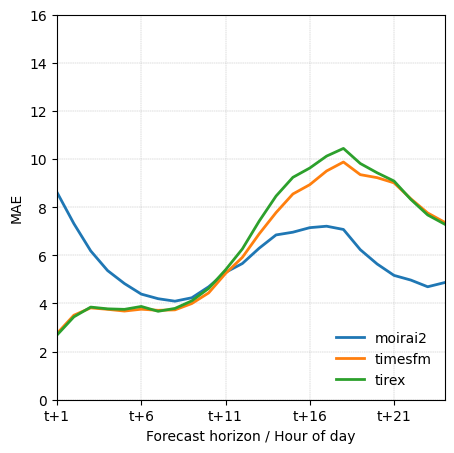

In [66]:
fig, ax = plt.subplots(figsize=(5,5))

errors.plot(ax=ax,
            color=[colordict.get(x, f'C{i}') for i, x in enumerate(errors.columns)],
            linewidth=2)

ax.set_ylim(bottom=0, top=16)
ax.set_xlim(left=0, right=23)
ax.legend([x for x in errors.columns], frameon=False, loc=4);
ax.set_ylabel('MAE');
ax.set_xlabel('Forecast horizon / Hour of day');
ax.grid(lw=.3, ls='--')

plt.savefig(here() / f'output/plots/horizon_mae-{FS}-{CONTEXT}.jpg', 
            dpi=300, bbox_inches='tight')

In [67]:
diff = np.abs(errors - errors.iloc[0]) / errors.iloc[0]
diff = (diff * 100).round(0).astype(int)
diff.to_latex(
    buf=here() / f'output/tables/horizon_mae-{FS}.tex',
)

/tmp/ipykernel_132951/2328195360.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  diff.to_latex(
